In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
X,_=make_blobs(n_samples=1000,centers=4)
print(X.shape)

(1000, 2)


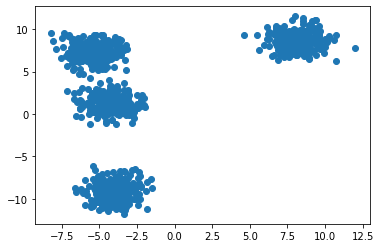

In [22]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [25]:
k=5

colors=['purple','red','green','blue','yellow']

clusters={}

for ix in range(k):
    center=10*(2*np.random.random((X.shape[1],) ) -1)
    
    points=[]
    
    cluster={
        "center":center,
        "points":points,
        "color":colors[ix]
    }
    
    clusters[ix]=cluster
    
print(clusters)

{0: {'center': array([-4.38409793, -8.94628517]), 'points': [], 'color': 'purple'}, 1: {'center': array([ 5.26888108, -2.92744167]), 'points': [], 'color': 'red'}, 2: {'center': array([-9.3969947 , -3.16534809]), 'points': [], 'color': 'green'}, 3: {'center': array([ 8.42658226, -5.16840747]), 'points': [], 'color': 'blue'}, 4: {'center': array([-2.68521498, -7.88346574]), 'points': [], 'color': 'yellow'}}


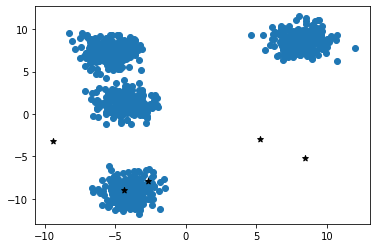

In [26]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
for ix in range(k):
    plt.scatter(clusters[ix]["center"][0],clusters[ix]["center"][1],color="black",marker="*")
plt.show()

In [27]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

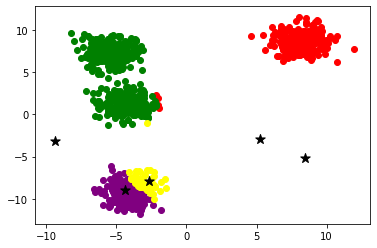

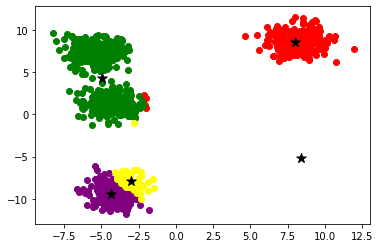

In [28]:
for ix in range(X.shape[0]):
    dis=[]
    curr_p=X[ix]
    
    for kx in range(k):
        d=distance(curr_p,clusters[kx]["center"])
        dis.append(d)
        
    assigned_cluster=np.argmin(dis)
    
    clusters[assigned_cluster]["points"].append(curr_p)
    
for kx in range(k):
    pnts=np.array(clusters[kx]["points"])
    
    clusters[kx]["coordinates"]=pnts
    
plt.figure(0)
for kx in range(k):
    pts=clusters[kx]['coordinates']
    
    try:
        plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker="*",s=100)
    
for kx in range(k):
    if clusters[kx]["coordinates"].shape[0]>0:
        new_center=clusters[kx]["coordinates"].mean(axis=0)
        
    else:
        new_center=clusters[kx]["center"]
        
    clusters[kx]["center"]=new_center
    clusters[kx]["points"]=[]
    
plt.figure(1)

for kx in range(k):
    pts=clusters[kx]['coordinates']
    
    try:
        plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker="*",s=100)
    
    
plt.show()    

In [29]:
#SKLEARN

In [33]:
from sklearn.cluster import KMeans

In [42]:
kmeans=KMeans(n_clusters=4)

In [43]:
z=kmeans.fit_transform(X)

In [44]:
cen=kmeans.cluster_centers_

In [45]:
Y=kmeans.labels_

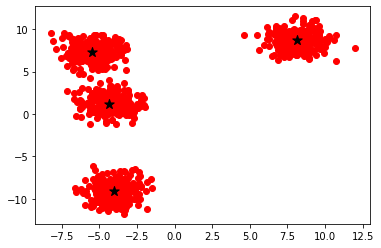

In [46]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c='red')
plt.scatter(cen[:,0],cen[:,1],marker="*",color="black",s=100)
plt.show()